# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('/Users/nguyenphucnhuhai/Downloads/nhuhai co lenn/loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [3]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [4]:
# 1. Drop 50% null values's columns
drop_col = []
for column in data.columns:
    null_col = data[column].isnull().mean()*100
    if null_col > 50:
        drop_col.append(column)
data.drop(columns = drop_col, inplace = True)
data.shape

(20000, 35)

In [5]:
#2. Categorical - delete if rows contain missing values
cat_col =data.select_dtypes(include='object').columns
data = data.dropna(subset=cat_col)
data.shape

(19900, 35)

In [6]:
#3. Numerical - use data imputation (mean)
num_col = data.select_dtypes(include =['int64','float64'])
num_col.dtypes
for column in num_col:
    data[column] = data[column].fillna(data[column].mean())
data.shape

(19900, 35)

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [8]:
cat_col = data.select_dtypes(include='object')

unique_cols = cat_col.columns[cat_col.nunique() == len(cat_col)]
unique_cols

Index(['ApplicationDate'], dtype='object')

In [31]:
#1. Delete the unique column
cat_col = data.select_dtypes(include='object')

unique_cols = cat_col.columns[cat_col.nunique() == len(cat_col)]

data = data.drop(columns=unique_cols)
data.shape

(19900, 34)

In [32]:
# 2. Apply one-hot encoding to the remaining categorical columns
data = pd.get_dummies(data, drop_first=True)

# Check
data.head(), data.shape

(    Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
 0  45.0         39948          617          22       13152            48   
 1  38.0         39709          628          15       26045            48   
 2  47.0         40724          570          26       17627            36   
 3  58.0         69084          545          34       37898            96   
 4  37.0        103264          594          17        9184            36   
 
    NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
 0                   2                  183                   0.354418   
 1                   1                  496                   0.087827   
 2                   2                  902                   0.137414   
 3                   1                  755                   0.267587   
 4                   1                  274                   0.320535   
 
    NumberOfOpenCreditLines  ...  MaritalStatus_Married  MaritalStatus_Single  \
 0       

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [33]:
# 1. Assign X and y for train and test data
X = data.drop(columns = 'LoanApproved')
y = data['LoanApproved']

In [34]:
# 2. Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48038342)

# Check train and test data shape
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((15920, 44), (3980, 44)), ((15920,), (3980,)))

### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [35]:
# 1.Train logistic regression
model = LogisticRegression() 
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 2. Outcomes metrics on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# 3. Outcomes metrics on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print('The result of accuracy score on training data is:',train_accuracy)
print('The result of f1 score on training data is:',train_f1)
print('\n')
print('The result of accuracy score on testing data is:',test_accuracy)
print('The result of f1 score on testing data is:',test_f1)

The result of accuracy score on training data is: 0.8915829145728643
The result of f1 score on training data is: 0.7601445247359644


The result of accuracy score on testing data is: 0.8804020100502512
The result of f1 score on testing data is: 0.7251732101616628


## Comment two metrics results on training and testing data
- ### Training data
  1. Accuracy score: 0.8915829145728643
  2. F1 score: 0.7601445247359644

- ### Testing data
  1. Accuracy score: 0.8804020100502512
  2. F1 score: 0.7251732101616628
 
### Accuracy score: 
- The accuracy in training data is slightly higher compared to that for testing data (the gap is quite small) with 89.16% and 88.04%, which indicating that the model performs well to unseen data and is not significant overfitting.

### F1 score:
- F1 score in training data is also greater than testing data with 76.01% and 72.25%, suggesting that the model is balanced precision and recall. Although the f1 score is moderate high, it doesn't show any overfitting signal as the result gap on both data is not large.

### => Not overfitting:
Following the previous comparisionm it is clearly stated that this model geneialized very well and there is no significant overfitting as the training and testing metrics are quite close.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [36]:
step_size = 1
accuracy_scores = []
f1_scores = []

# Set up the range for the number of retained features
num_features_list = range(X_train.shape[1], 0, -step_size)

In [37]:
 # Perform RFE in larger steps
for num_features in num_features_list:
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    
    y_test_pred_rfe = model.predict(X_test_rfe)
    
    accuracy_scores.append(accuracy_score(y_test, y_test_pred_rfe))
    f1_scores.append(f1_score(y_test, y_test_pred_rfe))

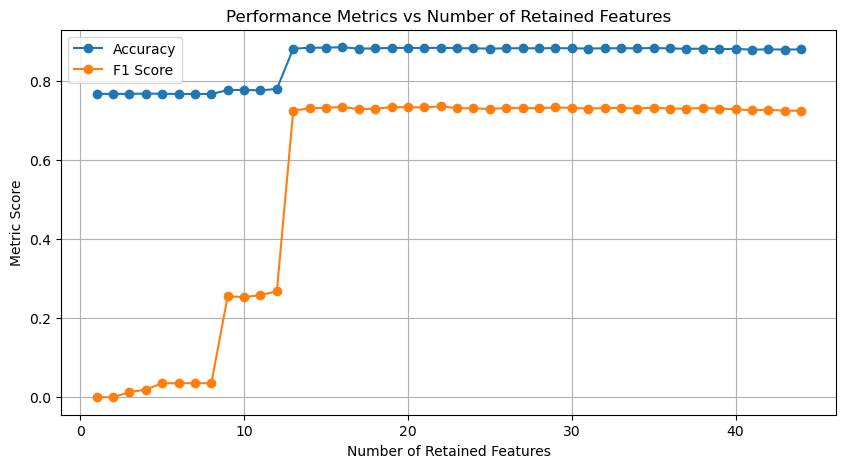

In [38]:
# Plot Accuracy and F1-Score and number of retained values
plt.figure(figsize=(10, 5))
plt.plot(num_features_list, accuracy_scores, marker='o', label='Accuracy')
plt.plot(num_features_list, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Number of Retained Features')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs Number of Retained Features')
plt.legend()
plt.grid()
plt.show()

In [39]:
rfe = RFE(estimator=model, n_features_to_select=13)

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]

model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_train = model.predict(X_train[selected_features])
y_pred_test = model.predict(X_test[selected_features])

# Calculate performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Performance on training set - Accuracy: {accuracy_train}, F1 Score: {f1_train}")
print(f"Performance on testing set - Accuracy: {accuracy_test}, F1 Score: {f1_test}")

Performance on training set - Accuracy: 0.8880653266331658, F1 Score: 0.747949080622348
Performance on testing set - Accuracy: 0.8824120603015075, F1 Score: 0.7256740914419695


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Select the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [40]:
# 1. Select the retained features and split dataset on new chosen features
X1 = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 48038342)
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((15920, 13), (3980, 13)), ((15920,), (3980,)))

In [41]:
# 2. Build 1-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

#3. Metrics on training and testing data
accuracy_test= accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Accuracy score on testing data is:',accuracy_test)
print('F1_score on testing data is:',f1_test)
print("\n")
print('Accuracy score on training data is:',accuracy_train)
print('F1_score on training data is:',f1_train)

Accuracy score on testing data is: 0.8173366834170854
F1_score on testing data is: 0.6147323794382619


Accuracy score on training data is: 1.0
F1_score on training data is: 1.0


### Comment on two metrics of accuracy and f1 score:
 ### Training data
  1. Accuracy score: 1.0
  2. F1 score: 1.0
- The model performs perfectly on the training data without any errors as the results of accuracy and f1 score is perfectly 1.

 ### Testing data
  1. Accuracy score: 0.8173366834170854
  2. F1 score: 0.6147323794382619
- However, compared to the training data results, metrics on testing data is significant low, especially F1 score with 0.614%.

 ### Overfitting Indication:
The perfect performance on the training data, combined with significantly lower performance on the testing data, is a clear indication of overfitting, resulting in poor generalization on unseen data


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [42]:
# 1. Use gridsearch to search K
param_grid = {'n_neighbors': range(1, 30)}  # Search K from 1 to 30
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Create results DataFrame
results = pd.DataFrame(grid_search.cv_results_)

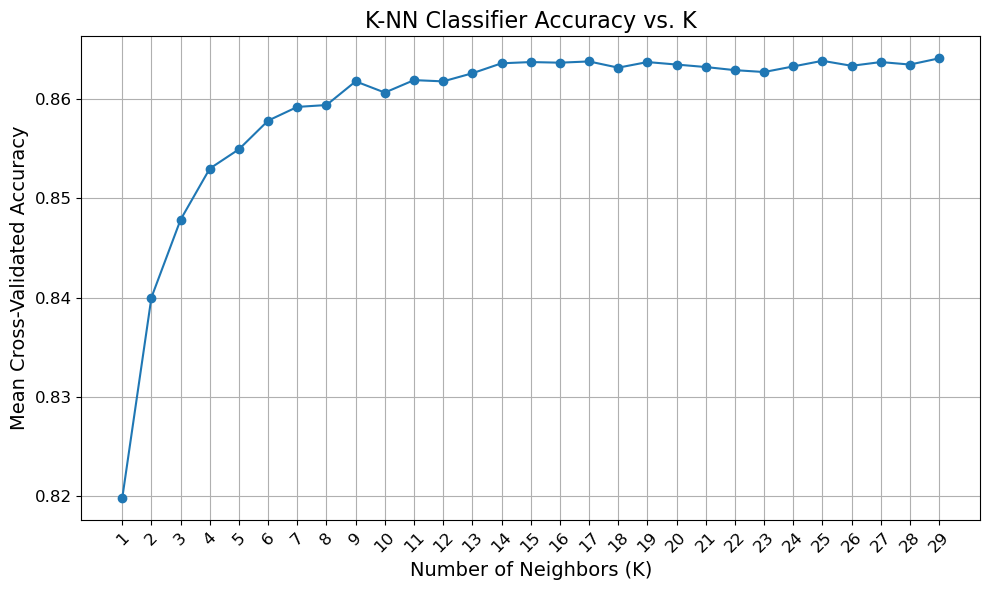

In [43]:
# 2. Visualize the performance change with respect to K
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='-')
plt.title('K-NN Classifier Accuracy vs. K', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Mean Cross-Validated Accuracy', fontsize=14)

plt.xticks(results['param_n_neighbors'].astype(int), fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [44]:
# Report the best parameters and metrics
best_k = 9
best_accuracy = grid_search.best_score_

# Evaluate F1 score for the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_test_best = knn_best.predict(X_test)

best_f1_score = f1_score(y_test, y_pred_test_best)
best_acc_score = accuracy_score(y_test, y_pred_test_best)

print(f'Best K: {best_k}')
print(f'Best Cross-Validated Accuracy: {best_accuracy}')
print(f'F1 Score on Test Data for Best K: {best_f1_score}')

Best K: 9
Best Cross-Validated Accuracy: 0.8641331658291456
F1 Score on Test Data for Best K: 0.6605922551252847


### Comment on the accuracy and f1 score between 2 number of k values ( k = 1 and k = best k = 9)

- k = 1:
  1. Accuracy score on testing data is: 81.7%
  2. F1_score on testing data is: 61.4%

- k = 9
  1. Best Cross-Validated Accuracy: 86.4%
  2. F1 Score on Test Data for Best K: 66.06%

### Comment:
- The accuracy and F1 scores indicate that, at k=9, the performance metrics are approximately 0.5% higher for each metric compared to k=1, indicating that finding the best k for the number of neighbors is important as it will increase the model's performance.

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [45]:
X1, y = make_classification(n_samples=19900, n_features=13, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Distance metrics to evaluate
metrics = ['euclidean', 'manhattan', 'cosine']
accuracy_scores = []
f1_scores = []

In [46]:
for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Create a DataFrame for better visualization
results = pd.DataFrame({
    'Metric': metrics,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores
})

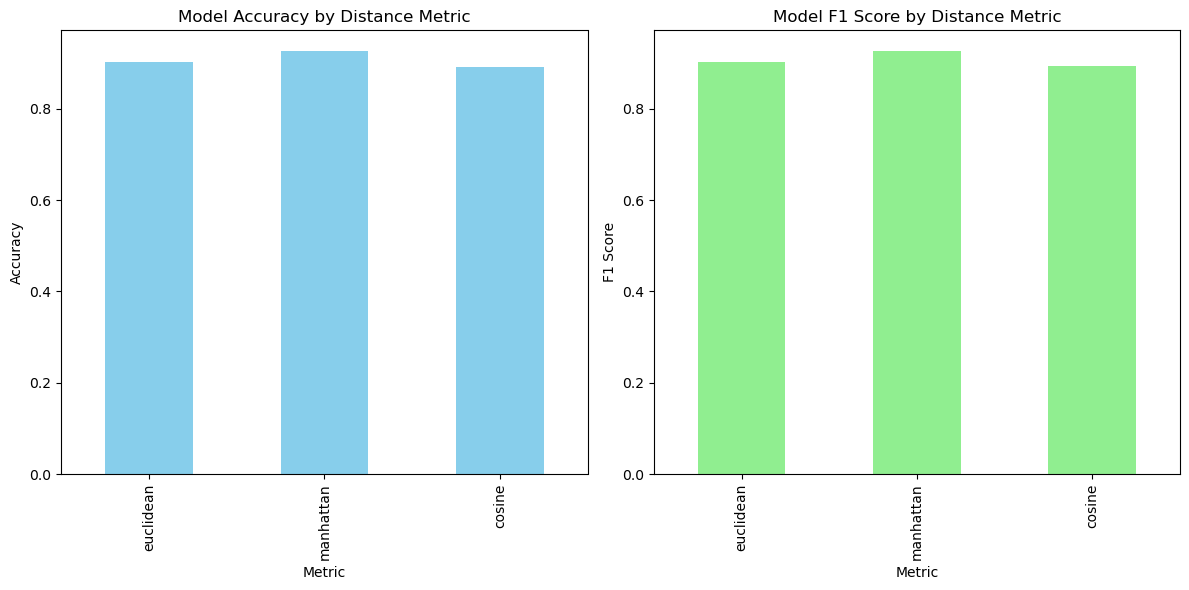

Best Accuracy: manhattan with score: 0.9253768844221105
Worst Accuracy: cosine with score: 0.8917085427135678
Best F1 Score: manhattan with score: 0.9256942707030273
Worst F1 Score: cosine with score: 0.8930786405358472


In [51]:
# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
results.plot(kind='bar', x='Metric', y='Accuracy', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Model Accuracy by Distance Metric')
ax[0].set_ylabel('Accuracy')

# F1 Score bar chart
results.plot(kind='bar', x='Metric', y='F1 Score', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Model F1 Score by Distance Metric')
ax[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

# Compare the performance metrics
best_accuracy_index = np.argmax(accuracy_scores)
worst_accuracy_index = np.argmin(accuracy_scores)
best_f1_index = np.argmax(f1_scores)
worst_f1_index = np.argmin(f1_scores)

print(f"Best Accuracy: {metrics[best_accuracy_index]} with score: {accuracy_scores[best_accuracy_index]}")
print(f"Worst Accuracy: {metrics[worst_accuracy_index]} with score: {accuracy_scores[worst_accuracy_index]}")
print(f"Best F1 Score: {metrics[best_f1_index]} with score: {f1_scores[best_f1_index]}")
print(f"Worst F1 Score: {metrics[worst_f1_index]} with score: {f1_scores[worst_f1_index]}")

### Comment:
- In this model, the distance type has the best performance in 2 metric outcomes is Manhattan type, with 92.53% accuracy score and 92.57% F1 score, while the worst type is cosine, with roughly 89% in both metrics.